In [1]:
import spot
spot.setup()
from decimal import Decimal
import decimal

from LabeledConsMDP import LCMDP

# Product of lCMDP and DBA with the link to LTL

The goal of this notebook is, given an LTL formula over the set $AP$ of atomic proposition and a consumption MDP with states labeled by subsets of $AP$, decide if there is a strategy for the MDP such that the LTL formula is satisfied with probability 1. We ilustrate the whole concept of a running example in which we want to enforce visiting 2 states infinitely often.

Let's first create a lCMDP, we will use the following function for easier definitions of actions using uniform distributions.

In [2]:
def uniform(dests):
    """Create a uniform distribution for given destinations.
    
    dests: iterable of states
    """
    count = len(dests)
    mod = 100 % count
    decimal.getcontext().prec = 2
    prob = Decimal(1)/Decimal(count)
    dist = {i: prob for i in dests}
    last = dests[-1]
    dist[last] = dist[last] + Decimal("0.01")*mod
    return dist

In the following code, we verify that we can achieve the Büchi objective with targets set `{1,2}` with capacity `5` and that is not enough to visit the state `1`. What we actualy want is to visit **both** of these states infinitely often. For that, we have introduced the atomic propositions and assign one to each of these two states. We reuse this labeling in the future code to achieve our goal.

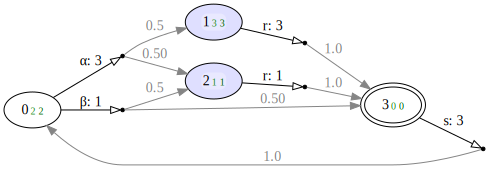

[set(), {0}, {1}, set()]

In [20]:
mdp = LCMDP(AP=["a","b"])
mdp.new_states(4, [set(), {0}, {1}, set()])
mdp.set_reload(3)
mdp.add_action(0, uniform([1,2]), "α", 3)
mdp.add_action(0, uniform([2,3]), "β", 1)
mdp.add_action(1, uniform([3]), "r", 3)
mdp.add_action(2, uniform([3]), "r", 1)
mdp.add_action(3, uniform([0]), "s", 3)
mdp.get_Buchi([1,2], 5, True)
display(mdp, mdp.state_labels)

The corresponding strategy confirms that the state 1 won't be visited by the strategy as there is no occurence of the action `α`.

In [21]:
mdp.energy_levels.get_strategy(4, True)

[{2: 'β'}, {3: 'r'}, {1: 'r'}, {0: 's'}]